# Introducción
En el presente notebook se propone un profundo y completo análisis de los datos que nos fueron proporcionados por Navent, a modo de Trabajo Práctico N°1 para la materia Organización de Datos (75.06) de la Facultad de Ingeniería de la UBA.

# Importación de librerías
A continuación, se importan las librerías y algunas magic functions para lograr un óptimo análisis de los datos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%matplotlib notebook
plt.style.use('default')

# Operaciones con los dataframes
Se realizarán algunas operaciones en los dataframes para facilitar el posterior análisis de los datos.

Entre ellas destacamos el join de dataframes y la creación (eliminación) de columnas útiles (inútiles)

### DF 1: Educación de los postulantes 

In [2]:
postulantes_educ = pd.read_csv('datos_navent_fiuba/fiuba_1_postulantes_educacion.csv')

# Renombro la columna 'nombre' por algo mas apropiado
postulantes_educ.rename(columns={'nombre':'titulo_univ'}, inplace=True)
postulantes_educ.head()

,idpostulante,titulo_univ,estado
0,NdJl,Posgrado,En Curso
1,8BkL,Universitario,En Curso
2,1d2B,Universitario,En Curso
3,NPBx,Universitario,En Curso
4,NPBx,Master,En Curso


### DF 2: Nacimiento y sexo de los postulantes 

In [3]:
postulantes_nac_sexo = pd.read_csv('datos_navent_fiuba/fiuba_2_postulantes_genero_y_edad.csv')
postulantes_nac_sexo.head()

,idpostulante,fechanacimiento,sexo
0,NM5M,1970-12-03,FEM
1,5awk,1962-12-04,FEM
2,ZaO5,1978-08-10,FEM
3,NdJl,1969-05-09,MASC
4,eo2p,1981-02-16,MASC


### DF 3: Vistas de los avisos 

In [4]:
avisos_vistas = pd.read_csv('datos_navent_fiuba/fiuba_3_vistas.csv')
avisos_vistas.head()

,idAviso,timestamp,idpostulante
0,1111780242,2018-02-23T13:38:13.187-0500,YjVJQ6Z
1,1112263876,2018-02-23T13:38:14.296-0500,BmVpYoR
2,1112327963,2018-02-23T13:38:14.329-0500,wVkBzZd
3,1112318643,2018-02-23T13:38:17.921-0500,OqmP9pv
4,1111903673,2018-02-23T13:38:18.973-0500,DrpbXDP


### DF 4: Postulaciones a los avisos 

In [5]:
postulaciones = pd.read_csv('datos_navent_fiuba/fiuba_4_postulaciones.csv')
postulaciones.head()

,idaviso,idpostulante,fechapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34
1,1111920714,NM5M,2018-02-06 09:04:50
2,1112346945,NM5M,2018-02-22 09:04:47
3,1112345547,NM5M,2018-02-22 09:04:59
4,1112237522,5awk,2018-01-25 18:55:03


### DF 5: ID de los avisos 

In [6]:
id_avisos = pd.read_csv('datos_navent_fiuba/fiuba_5_avisos_online.csv')
id_avisos.head()

,idaviso
0,1112355872
1,1112335374
2,1112374842
3,1111984070
4,1111822480


### DF 6: Detalles de los avisos 

In [7]:
avisos_detalles = pd.read_csv('datos_navent_fiuba/fiuba_6_avisos_detalle.csv')
avisos_detalles.head()

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR
1,17903700,1,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste
2,1000150677,1,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,NaN,Empedrado 2336,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL
3,1000610287,1,CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Transporte,Wurth Argentina S.A
4,1000872556,1,Operarios de Planta - Rubro Electrodomésticos,<p><strong>OPERARIOS DE PLANTA</strong></p><p>...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producción,ELECTRO OUTLET SRL


### Creación de la columna 'edad' en el dataframe 2

In [8]:
postulantes_nac_sexo = pd.read_csv('datos_navent_fiuba/fiuba_2_postulantes_genero_y_edad.csv')

postulantes_nac_sexo = postulantes_nac_sexo.rename(columns={'fechanacimiento': 'edad'})
fecha_nac = postulantes_nac_sexo['edad'].str.split('-')
edad = fecha_nac.str[0]
postulantes_nac_sexo['edad'] = edad
postulantes_nac_sexo['edad'] = pd.to_numeric(postulantes_nac_sexo['edad'], errors='coerce').fillna(0).astype(np.int64)

In [9]:
#Elimino las edades inválidas
edad_min = postulantes_nac_sexo['edad'] > 2000
edad_max = postulantes_nac_sexo['edad'] < 1940
condicion_final = ((edad_min | edad_max))
postulantes_nac_sexo = postulantes_nac_sexo[np.logical_not(condicion_final)]
postulantes_nac_sexo['edad'] = postulantes_nac_sexo['edad'].apply(lambda x: 2018-x)

postulantes_nac_sexo.head()

,idpostulante,edad,sexo
0,NM5M,48,FEM
1,5awk,56,FEM
2,ZaO5,40,FEM
3,NdJl,49,MASC
4,eo2p,37,MASC


### Join de los dataframes 1 y 2
Antes de hacer el join, compruebo la longitud de cada uno.
Como son distintas, sé que voy a tener algunas columnas con valores NaN.

Por el momento las dejo, no influyen negativamente en el análisis.

In [10]:
print("Longitud del DF 1:", len(postulantes_educ))
print("Longitud del DF 2:", len(postulantes_nac_sexo))

Longitud del DF 1: 298231
Longitud del DF 2: 196126


Realizo un outer join para tener absolutamente todos los registros

In [11]:
postulantes = pd.merge(postulantes_nac_sexo, postulantes_educ, on='idpostulante', how='outer')
postulantes.sample(10)

,idpostulante,edad,sexo,titulo_univ,estado
205277,96z6Aa8,25.0,FEM,Terciario/Técnico,Graduado
294591,akj3YeZ,22.0,FEM,Otro,Graduado
197619,6rZXBjx,31.0,MASC,Universitario,Graduado
255575,pzdAN2b,25.0,FEM,Universitario,Abandonado
43823,aWqE0J,31.0,MASC,Secundario,Graduado
124825,ZD86ENb,40.0,FEM,Secundario,Graduado
130102,96M8rE1,22.0,FEM,Secundario,En Curso
300753,MVrXMGr,23.0,FEM,Universitario,Graduado
136310,dYodaJM,22.0,FEM,Secundario,Graduado
66566,xke8L1j,33.0,MASC,Secundario,Graduado


### Creación y eliminación de algunas columnas de los dataframes 3 y 4
Se agregan las columnas 'fecha_XXXX', 'mes_XXXX', 'dia_semana_XXXX' y 'hora_XXXX'.

NOTA: No interesa la columna del año ya que todos los registros son del 2018.

In [12]:
avisos_vistas = pd.read_csv('datos_navent_fiuba/fiuba_3_vistas.csv')

lista = avisos_vistas['timestamp'].str.split("T")
fecha = lista.str[0]
hora = lista.str[1].str.split(".").str[0]

# Creo las columnas mencionadas
avisos_vistas['fecha_vista'] = pd.to_datetime(fecha)
avisos_vistas['mes_vista'] = avisos_vistas['fecha_vista'].dt.month
avisos_vistas['dia_semana_vista'] = avisos_vistas['fecha_vista'].dt.dayofweek
avisos_vistas['hora_vista'] = hora

# Elimino la columna 'timestamp' dado que ya me guardé los datos útiles en las nuevas columnas
del avisos_vistas['timestamp']

# Renombro la columna 'idAviso'
avisos_vistas.rename(columns={'idAviso':'idaviso'}, inplace=True)

# Reordeno las columnas de una forma más apropiada
avisos_vistas = avisos_vistas[['idaviso','idpostulante','fecha_vista','mes_vista','dia_semana_vista','hora_vista']]

# Cambio los números de día y mes por su texto real
avisos_vistas.loc[avisos_vistas['dia_semana_vista'] == 0, 'dia_semana_vista'] = 'Lunes'
avisos_vistas.loc[avisos_vistas['dia_semana_vista'] == 1, 'dia_semana_vista'] = 'Martes'
avisos_vistas.loc[avisos_vistas['dia_semana_vista'] == 2, 'dia_semana_vista'] = 'Miércoles'
avisos_vistas.loc[avisos_vistas['dia_semana_vista'] == 3, 'dia_semana_vista'] = 'Jueves'
avisos_vistas.loc[avisos_vistas['dia_semana_vista'] == 4, 'dia_semana_vista'] = 'Viernes'
avisos_vistas.loc[avisos_vistas['dia_semana_vista'] == 5, 'dia_semana_vista'] = 'Sábado'
avisos_vistas.loc[avisos_vistas['dia_semana_vista'] == 6, 'dia_semana_vista'] = 'Domingo'

avisos_vistas.loc[avisos_vistas['mes_vista'] == 1, 'mes_vista'] = 'Enero'
avisos_vistas.loc[avisos_vistas['mes_vista'] == 2, 'mes_vista'] = 'Febrero'
avisos_vistas.loc[avisos_vistas['mes_vista'] == 3, 'mes_vista'] = 'Marzo'
avisos_vistas.loc[avisos_vistas['mes_vista'] == 4, 'mes_vista'] = 'Abril'
avisos_vistas.loc[avisos_vistas['mes_vista'] == 5, 'mes_vista'] = 'Mayo'
avisos_vistas.loc[avisos_vistas['mes_vista'] == 6, 'mes_vista'] = 'Junio'
avisos_vistas.loc[avisos_vistas['mes_vista'] == 7, 'mes_vista'] = 'Julio'
avisos_vistas.loc[avisos_vistas['mes_vista'] == 8, 'mes_vista'] = 'Agosto'
avisos_vistas.loc[avisos_vistas['mes_vista'] == 9, 'mes_vista'] = 'Septiembre'
avisos_vistas.loc[avisos_vistas['mes_vista'] == 10, 'mes_vista'] = 'Octubre'
avisos_vistas.loc[avisos_vistas['mes_vista'] == 11, 'mes_vista'] = 'Noviembre'
avisos_vistas.loc[avisos_vistas['mes_vista'] == 12, 'mes_vista'] = 'Diciembre'

avisos_vistas.sample(10)

,idaviso,idpostulante,fecha_vista,mes_vista,dia_semana_vista,hora_vista
197088,1112343194,6a8m5R,2018-02-25,Febrero,Domingo,08:52:07
836738,1111525499,5Eo6RG,2018-02-28,Febrero,Miércoles,11:24:53
145970,1112347605,bOVBqR9,2018-02-24,Febrero,Sábado,21:59:56
638899,1112366334,2zQaQRv,2018-02-27,Febrero,Martes,14:23:37
643580,1112154327,5ZQq1p,2018-02-27,Febrero,Martes,15:42:39
101650,1112325585,4rdjEGM,2018-02-24,Febrero,Sábado,11:30:39
427157,1112308839,Pm4lkZv,2018-02-26,Febrero,Lunes,15:58:56
282667,1112355444,zv8eKbb,2018-02-26,Febrero,Lunes,07:40:04
848386,1112368720,Bm5GkdZ,2018-02-28,Febrero,Miércoles,12:22:07
353175,1112361735,2zkDxzV,2018-02-26,Febrero,Lunes,11:43:29


In [13]:
postulaciones = pd.read_csv('datos_navent_fiuba/fiuba_4_postulaciones.csv')

lista = postulaciones['fechapostulacion'].str.split(" ")
fecha = lista.str[0]
hora = lista.str[1]

# Creo las columnas mencionadas
postulaciones['fecha_post'] = pd.to_datetime(fecha)
postulaciones['mes_post'] = postulaciones['fecha_post'].dt.month
postulaciones['dia_semana_post'] = postulaciones['fecha_post'].dt.dayofweek
postulaciones['hora_post'] = hora

# Elimino la columna 'fechapostulacion' ya que ya me guardé los datos útiles en las nuevas columnas
del postulaciones['fechapostulacion']

# Reordeno las columnas de una forma más apropiada
postulaciones = postulaciones[['idaviso','idpostulante','fecha_post','mes_post','dia_semana_post','hora_post']]

# Cambio los números de día y mes por su texto real
postulaciones.loc[postulaciones['dia_semana_post'] == 0, 'dia_semana_post'] = 'Lunes'
postulaciones.loc[postulaciones['dia_semana_post'] == 1, 'dia_semana_post'] = 'Martes'
postulaciones.loc[postulaciones['dia_semana_post'] == 2, 'dia_semana_post'] = 'Miércoles'
postulaciones.loc[postulaciones['dia_semana_post'] == 3, 'dia_semana_post'] = 'Jueves'
postulaciones.loc[postulaciones['dia_semana_post'] == 4, 'dia_semana_post'] = 'Viernes'
postulaciones.loc[postulaciones['dia_semana_post'] == 5, 'dia_semana_post'] = 'Sábado'
postulaciones.loc[postulaciones['dia_semana_post'] == 6, 'dia_semana_post'] = 'Domingo'

postulaciones.loc[postulaciones['mes_post'] == 1, 'mes_post'] = 'Enero'
postulaciones.loc[postulaciones['mes_post'] == 2, 'mes_post'] = 'Febrero'
postulaciones.loc[postulaciones['mes_post'] == 3, 'mes_post'] = 'Marzo'
postulaciones.loc[postulaciones['mes_post'] == 4, 'mes_post'] = 'Abril'
postulaciones.loc[postulaciones['mes_post'] == 5, 'mes_post'] = 'Mayo'
postulaciones.loc[postulaciones['mes_post'] == 6, 'mes_post'] = 'Junio'
postulaciones.loc[postulaciones['mes_post'] == 7, 'mes_post'] = 'Julio'
postulaciones.loc[postulaciones['mes_post'] == 8, 'mes_post'] = 'Agosto'
postulaciones.loc[postulaciones['mes_post'] == 9, 'mes_post'] = 'Septiembre'
postulaciones.loc[postulaciones['mes_post'] == 10, 'mes_post'] = 'Octubre'
postulaciones.loc[postulaciones['mes_post'] == 11, 'mes_post'] = 'Noviembre'
postulaciones.loc[postulaciones['mes_post'] == 12, 'mes_post'] = 'Diciembre'

postulaciones.sample(10)

,idaviso,idpostulante,fecha_post,mes_post,dia_semana_post,hora_post
920975,1112316872,xkO06AY,2018-02-27,Febrero,Martes,12:07:52
843966,1112289648,GNZbbX9,2018-02-01,Febrero,Jueves,08:18:53
2176448,1112241767,A3RGNDY,2018-01-23,Enero,Martes,22:16:59
2104377,1112283156,56XJzM,2018-01-26,Enero,Viernes,18:44:53
1953098,1112034243,ow206VZ,2018-02-07,Febrero,Miércoles,16:22:23
654607,1112345900,KBdl6z0,2018-02-22,Febrero,Jueves,13:13:52
1145910,1112261309,1YWPQ3,2018-01-16,Enero,Martes,04:55:00
1608962,1112349298,Drl8OlA,2018-02-21,Febrero,Miércoles,11:54:44
2299605,1112286510,owElaqj,2018-02-19,Febrero,Lunes,08:27:11
161675,1112222866,6ovawx,2018-01-16,Enero,Martes,18:45:58


### Eliminación de algunas columnas del dataframe 6
Se eliminan las columnas 'ciudad' y 'mapacalle', debido a su gran cantidad de valores nulos.

Creemos que esto no aportaría un análisis representativo de la realidad.

A su vez, se elimina la columna 'idpais', ya que todos los registros tienen el mismo id.

In [14]:
# Analizo la cantidad de valores nulos que hay en las columnas de ciudad y de calle
ciudad_null = avisos_detalles['ciudad'].isnull().sum()
mapacalle_null = avisos_detalles['mapacalle'].isnull().sum() 
print("En total hay", len(avisos_detalles), "registros")
print("De los cuales", ciudad_null, "carecen de ciudad y", mapacalle_null, "de calle")

En total hay 13534 registros
De los cuales 13487 carecen de ciudad y 12662 de calle


In [15]:
# Analizo la cantidad de valores que hay en la columna 'idpais'
avisos_detalles['idpais'].value_counts()

1    13534
Name: idpais, dtype: int64

In [16]:
avisos_detalles = pd.read_csv('datos_navent_fiuba/fiuba_6_avisos_detalle.csv')

# Renombro la columna 'tipo_de_trabajo' por algo mas apropiado
avisos_detalles.rename(columns={'tipo_de_trabajo':'jornada_laboral'}, inplace=True)

# Elimino las columnas arriba mencionadas
del avisos_detalles['ciudad']
del avisos_detalles['mapacalle']
del avisos_detalles['idpais']

avisos_detalles.sample(10)

,idaviso,titulo,descripcion,nombre_zona,jornada_laboral,nivel_laboral,nombre_area,denominacion_empresa
6644,1112303937,Tecnico en Reparacion,"<p><em style="""">Empresa dedicada a la </em><em...",Gran Buenos Aires,Full-time,Senior / Semi-Senior,Mantenimiento,RANDSTAD
12271,1112267850,TEAM LEADER DE MARKETING,<p>Inchcape plc. empresa líder global en distr...,Gran Buenos Aires,Full-time,Senior / Semi-Senior,Marketing,Empresas Inchcape plc
1769,1112287901,Ingenieros Industriales/Mecánicos Z/Baradero.,<p>Nos encontramos en la búsqueda de Ingeniero...,Gran Buenos Aires,Full-time,Senior / Semi-Senior,Ingeniería Industrial,BAYTON
6768,1112305894,Técnico/a Electromecánico/a o Mecatronico/a,<p><strong>Adecco Industrial </strong>está esp...,Gran Buenos Aires,Full-time,Senior / Semi-Senior,Otros,Adecco -Región Litoral
10998,1111741891,Atención al cliente,<p><strong>Empresa:</strong> Cinema Adrogue</p...,Capital Federal,Part-time,Junior,Atención al Cliente,Cinema Adrogue
12738,1112274754,Jefe/a Comercial,<p> </p><p><strong>Adecco Office</strong> está...,Gran Buenos Aires,Full-time,Senior / Semi-Senior,Desarrollo de Negocios,Adecco -Región Litoral
12102,1112264776,vendedor de camiones,<p>Hombre de 26 a 40 años con experiencia en v...,Gran Buenos Aires,Full-time,Senior / Semi-Senior,Ventas,NEW TALENT
12142,1112265759,Ejecutivo de Venta de Viajes- Còrdoba,<p>Nos encontramos en la búsqueda de Ejecutivo...,Gran Buenos Aires,Part-time,Senior / Semi-Senior,Comercial,TM Consulting
11661,1112207854,Enfermero/a Laboral para Centro de Distribuci...,<p>Para importante empresa nacional líder del ...,Gran Buenos Aires,Full-time,Senior / Semi-Senior,Medicina,Garbarino
1334,1112279999,Ejecutivo de Cuentas en Puerto Madero,"<p><span lang=""ES"">Esta es tu oportunidad para...",Gran Buenos Aires,Full-time,Senior / Semi-Senior,Marketing,Atento


# Análisis exploratorio de los datos
A partir de aquí se realizarán una serie de análisis de los datos provistos por Navent que consideramos interesantes. 

Todos ellos estarán acompañados de gráficos explicativos y textos que faciliten el correcto entendimiento.

### Cantidad de vistas según titulo universitario

In [17]:
# Hago un right join ya que me interesan aquellos postulantes que efectivamente
# visualizaron un aviso --> idaviso = NaN no me interesa
vistas_postulantes = pd.merge(postulantes, avisos_vistas, on='idpostulante', how='right')
vistas_postulantes.sample(10)

,idpostulante,edad,sexo,titulo_univ,estado,idaviso,fecha_vista,mes_vista,dia_semana_vista,hora_vista
1238196,QNrGeAN,23.0,FEM,Universitario,En Curso,1112317729,2018-02-25,Febrero,Domingo,20:25:13
521347,0zr8mLv,34.0,MASC,Universitario,En Curso,1110497155,2018-02-26,Febrero,Lunes,18:08:50
1491858,DrXpYmA,NaN,NaN,NaN,NaN,1112334791,2018-02-28,Febrero,Miércoles,07:12:59
1080128,xkvwGz6,35.0,FEM,Universitario,Graduado,1112356904,2018-02-27,Febrero,Martes,08:04:20
253173,NKDpRL,30.0,MASC,Secundario,Graduado,1112367799,2018-02-28,Febrero,Miércoles,16:19:57
749983,xkpKeJY,25.0,FEM,Terciario/Técnico,Abandonado,1112295346,2018-02-26,Febrero,Lunes,14:10:18
1123098,lD5qoeR,19.0,MASC,Secundario,Graduado,1112296005,2018-02-28,Febrero,Miércoles,19:36:27
427251,A3Aqv8j,30.0,MASC,Secundario,Graduado,1112308402,2018-02-27,Febrero,Martes,08:54:54
572909,1Qqbo5b,41.0,FEM,Terciario/Técnico,Graduado,1112335278,2018-02-25,Febrero,Domingo,18:51:44
1259974,vVj0O4G,39.0,FEM,Secundario,Graduado,1112241774,2018-02-25,Febrero,Domingo,10:44:28


In [18]:
# Elimino los registros que tienen valor nulo en el titulo universitario
vistas_titulo_univ = vistas_postulantes.dropna(subset=['titulo_univ'])

# Elimino los registros que tienen mismo id, mismo titulo_univ y mismo idaviso
vistas_titulo_univ.drop_duplicates(subset=['idpostulante','titulo_univ','idaviso'], inplace=True)

c:\users\casarodri\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


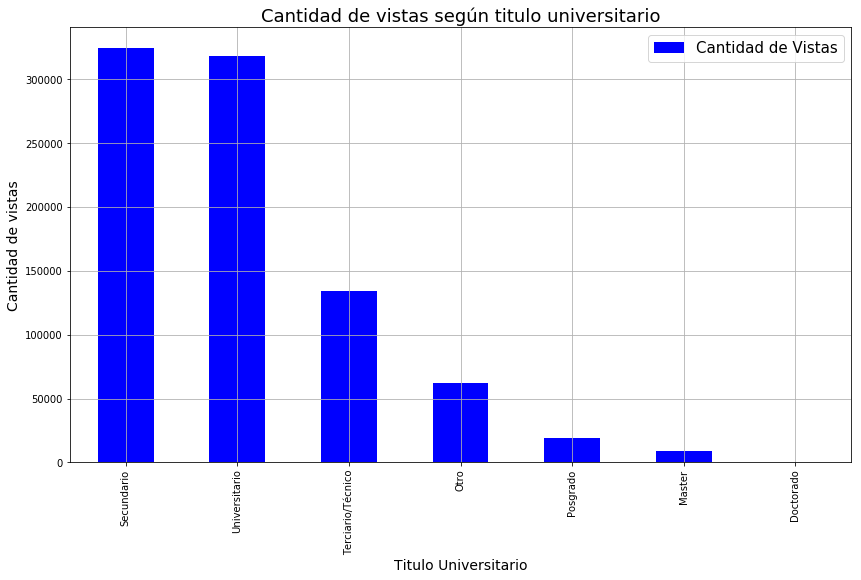

In [19]:
plot_titulo_univ = vistas_titulo_univ.groupby('titulo_univ')['titulo_univ'].agg('count')\
                  .sort_values(ascending=False).plot(kind='bar', color="blue", figsize=(14,8), grid = True)
plot_titulo_univ.set_title('Cantidad de vistas según titulo universitario', fontsize=18)
plot_titulo_univ.set_xlabel('Titulo Universitario', fontsize=14)
plot_titulo_univ.set_ylabel('Cantidad de vistas', fontsize=14);
plot_titulo_univ.legend(labels = ['Cantidad de Vistas'],fontsize=15)

A partir del gráfico, podemos ver que la gente que más visualiza estos anuncios laborales posee un título secundario o universitario, lo cual tiene sentido considerando que en su gran mayoría son personas jóvenes en búsqueda de sus primeros empleos.

### Cantidad de Postulaciones según título universitario

In [20]:
postulantes_titulos = postulantes.dropna(subset=["titulo_univ"])
postulantes_titulos.groupby("titulo_univ")['titulo_univ'].count()

titulo_univ
Doctorado               214
Master                 3598
Otro                  24748
Posgrado               7387
Secundario           110256
Terciario/Técnico     47733
Universitario        104295
Name: titulo_univ, dtype: int64

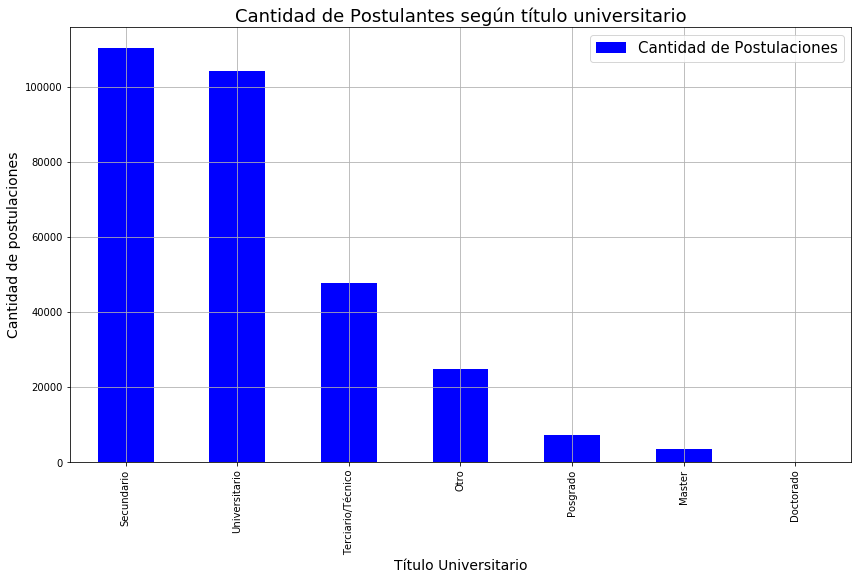

In [21]:
plot_titulo = postulantes_titulos.groupby('titulo_univ')['titulo_univ'].agg('count')\
                  .sort_values(ascending=False).plot(kind='bar', color='blue', grid = True, figsize=(14,8))
plot_titulo.set_title('Cantidad de Postulantes según título universitario', fontsize=18)
plot_titulo.set_xlabel('Título Universitario', fontsize=14)
plot_titulo.set_ylabel('Cantidad de postulaciones', fontsize=14)
plot_titulo.legend(labels = ['Cantidad de Postulaciones'],fontsize=15)

Se mantiene la tendencia de las vistas: la mayor cantidad de postulantes posee un título secundario o universitario.

### Cantidad de vistas según el sexo

c:\users\casarodri\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0,0.5,'Cantidad de vistas')

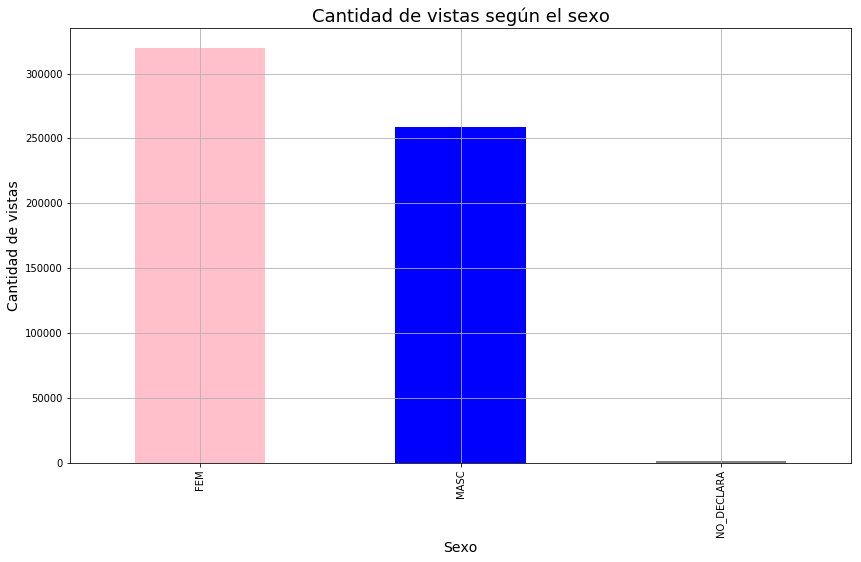

In [22]:
# Elimino los registros que tienen mismo id, mismo sexo, mismo idaviso
vistas_sexo = vistas_postulantes.dropna(subset=['sexo'])
vistas_sexo.drop_duplicates(subset=['idpostulante','sexo','idaviso'], inplace=True)

plot_vistas_sexo = vistas_sexo.groupby('sexo')['sexo'].agg('count')\
                  .sort_values(ascending=False).plot(kind='bar', grid = True, color=['pink', 'blue', 'grey'], figsize=(14,8))        
plot_vistas_sexo.set_title('Cantidad de vistas según el sexo', fontsize=18)
plot_vistas_sexo.set_xlabel('Sexo', fontsize=14)
plot_vistas_sexo.set_ylabel('Cantidad de vistas', fontsize=14)
#plot_vistas_sexo.legend(labels = ['Mujeres', 'Hombres', 'No Declara'],fontsize=15)

Podemos ver que las mujeres visualizan más anuncios que los hombres, aunque la diferencia no es tan notoria. 

In [23]:
cantidad_vistas = avisos_vistas[['idaviso','idpostulante']]
cantidad_vistas = cantidad_vistas.groupby(['idaviso']).size().to_frame('cantidad_vistas').reset_index()

cantidad_postulaciones = postulaciones[['idaviso','idpostulante']]
cantidad_postulaciones = cantidad_postulaciones.groupby(['idaviso']).size()\
    .to_frame('cantidad_postulaciones').reset_index()

#agrego cantidad de vistas al dataframe de los detalles de los avisos    
avisos_detalles_vist = pd.merge(cantidad_vistas,avisos_detalles,on='idaviso',how='outer')
#agrego cantidad de postulaciones al dataframe de los detalles de los avisos
avisos_detalles_vist_post = pd.merge(cantidad_postulaciones,avisos_detalles_vist,on='idaviso',how='outer')
#elimino las filas que tienen datos nulos sobre los avisos
avisos_detalles_vist_post = avisos_detalles_vist_post[pd.notnull(avisos_detalles_vist_post['descripcion'])]
#elimino las filas que tienen nula la cantidad de vistas y postulaciones
vista = np.isnan(avisos_detalles_vist_post['cantidad_vistas'])
post = np.isnan(avisos_detalles_vist_post['cantidad_postulaciones'])
vistaypost = vista & post
avisos_rating = avisos_detalles_vist_post[np.logical_not(vistaypost)]
#relleno los nulos de las vistas y postulaciones, para poder realizar el rating (postulaciones/vistas)
avisos_rating['cantidad_vistas'] = avisos_rating['cantidad_vistas'].fillna(1)
avisos_rating['cantidad_postulaciones'] = avisos_rating['cantidad_postulaciones'].fillna(1)
avisos_rating['rating'] = (avisos_rating['cantidad_postulaciones']/avisos_rating['cantidad_vistas'])
# Convierto la relacion(rating) entre 0 y 100 multiplicando por 100.
avisos_rating['rating'] = avisos_rating['rating']*100
# Los que pasan 100 de rating los elimino, ya que son cifras ficticias. 
avisos_rating = avisos_rating[avisos_rating['cantidad_vistas']>=avisos_rating['cantidad_postulaciones']]
# El problema se haya en los usuarios que visitan offline y luego se loguean dentro del aviso y se postulan.
# Asi mismo, no sabemos la cantidad total de visitas de cada anuncio por las visitas sin logueo previo.
# Igualmente consideramos analizar los demas ya que podemos ver avisos con mayor cantidad de visitas que postulaciones.
# Eso nos deja un rating, que podria ser menor, pero aun asi podemos ver ratings bajos que van a seguir siendo bajos.


c:\users\casarodri\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\casarodri\anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\casarodri\anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing

[0, 100, 0, 4000]

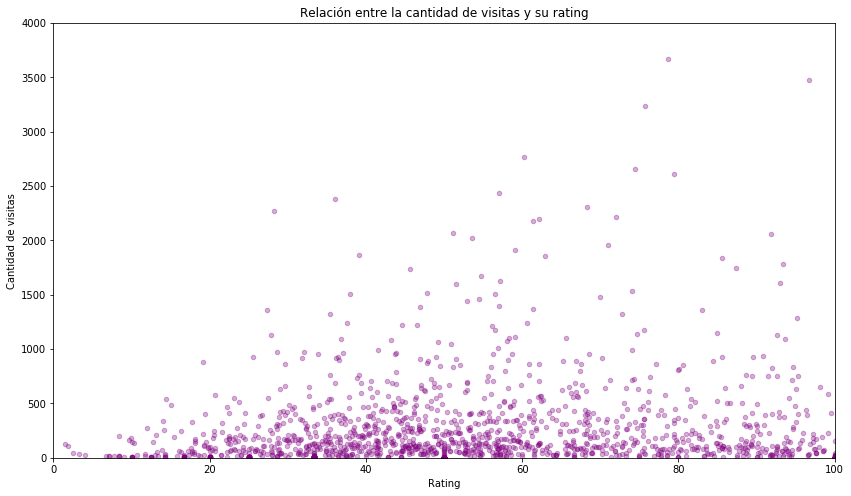

In [24]:

plot = avisos_rating.plot.scatter('rating', 'cantidad_vistas', alpha=0.32, color = 'purple', title = "Relación entre la cantidad de visitas y su rating",figsize=(14,8))
plot.set_xlabel("Rating")
plot.set_ylabel("Cantidad de visitas")
plot.axis([0,100,0,4000])

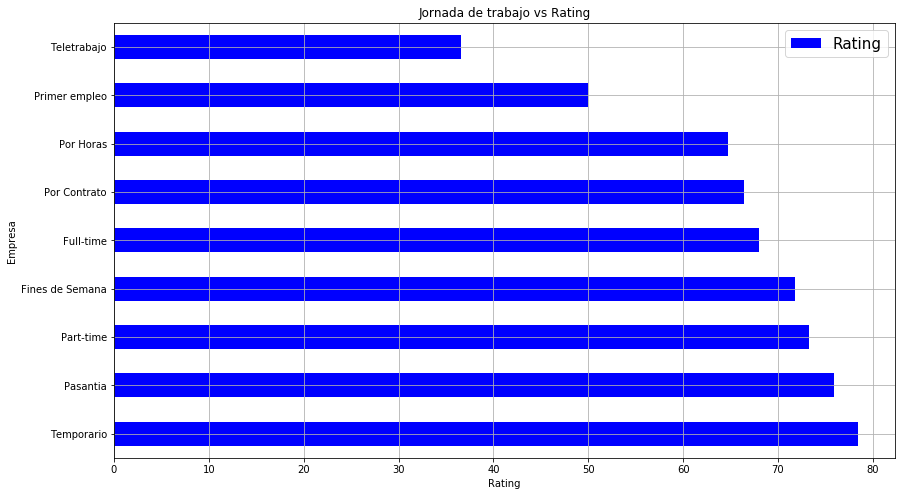

In [25]:
avisos_jornada_rating = avisos_rating[['jornada_laboral', 'rating']]
plot1 = avisos_jornada_rating.groupby(['jornada_laboral']).mean().sort_values('rating', ascending = False).plot(kind = 'barh',color='blue'\
                                                                            ,figsize=(14,8),legend=None,title='Jornada de trabajo vs Rating', grid = True)
plot1.set_xlabel("Rating")
plot1.set_ylabel("Empresa")
plot1.legend(labels = ['Rating'],fontsize=15)

In [26]:
#Top 15 anuncios de menor rating
avisos_menor_rating = avisos_rating[['rating','jornada_laboral','nombre_area','nivel_laboral','denominacion_empresa']]
avisos_menor_rating.sort_values('rating',ascending = True).head(15)

,rating,jornada_laboral,nombre_area,nivel_laboral,denominacion_empresa
11935,1.526718,Full-time,Educación/ Docentes,Senior / Semi-Senior,Neo-Biz Consultores
12061,1.818182,Full-time,Tecnologia / Sistemas,Senior / Semi-Senior,TEST MDAN2
13620,2.439024,Full-time,Diseño Industrial,Senior / Semi-Senior,BUMERAN.COM ARGENTINA
12048,3.225806,Full-time,Programación,Senior / Semi-Senior,NG Empleos
12062,4.000000,Full-time,Programación,Senior / Semi-Senior,Telescope Services
447,6.666667,Full-time,Traduccion,Senior / Semi-Senior,Adecco - Región Centro Norte y Agro.
12081,7.142857,Full-time,Programación,Senior / Semi-Senior,SOLUTIX S.A.
13216,7.142857,Full-time,Ventas,Senior / Semi-Senior,vibra marketing
12397,7.692308,Full-time,Programación,Senior / Semi-Senior,ML Soluciones Humanas
12051,8.333333,Full-time,Programación,Senior / Semi-Senior,FLOWING CODE S.A.


### Cantidad de Vistas/ Postulaciones según día de la semana

In [27]:
postulaciones_dias = postulaciones['dia_semana_post'].value_counts().reset_index()
vistas_dias = avisos_vistas['dia_semana_vista'].value_counts().reset_index()
merge_postulaciones_vistas = pd.merge(postulaciones_dias, vistas_dias, on='index', how='inner')
merge_postulaciones_vistas.rename(columns={'index':'dia_semana'}, inplace=True)
merge_postulaciones_vistas

,dia_semana,dia_semana_post,dia_semana_vista
0,Miércoles,677836,226826
1,Lunes,668310,240783
2,Martes,658428,230947
3,Viernes,446698,67747
4,Domingo,226857,105245
5,Sábado,217331,90349


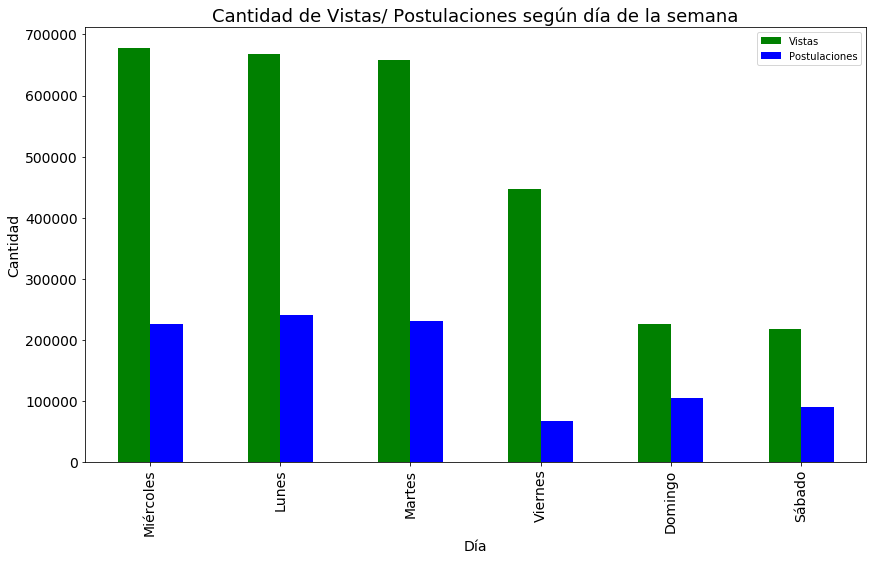

In [28]:
plot_dias = merge_postulaciones_vistas.plot(kind = 'bar',\
            color=['green','blue'],legend=None, grid = False, figsize=(14,8), fontsize=14, x='dia_semana')
plot_dias.set_title("Cantidad de Vistas/ Postulaciones según día de la semana", fontsize=18)
plot_dias.set_xlabel("Día", fontsize=14)
plot_dias.set_ylabel("Cantidad", fontsize=14)
plot_dias.legend(labels = ['Vistas', 'Postulaciones'])

Los primeros tres días de la semana son aquellos que se llevan la mayor cantidad de vistas y postulaciones. Esto demuestra que la gente tiende a buscar y/o postularse a trabajos al inicio de la semana.

### Cantidad de Vistas/ Postulaciones según la hora del día

In [29]:
horario_postulaciones = postulaciones.loc[:,('hora_post','idaviso')]
tiempo = horario_postulaciones['hora_post'].str.split(':')
hora = tiempo.str[0]
horario_postulaciones['hora_post'] = hora

horario_vistas = avisos_vistas.loc[:,('hora_vista','idaviso')]
tiempo = horario_vistas['hora_vista'].str.split(':')
hora = tiempo.str[0]
horario_vistas['hora_vista'] = hora

horario_vistas = horario_vistas['hora_vista'].value_counts().reset_index().sort_values('index')
horario_postulaciones = horario_postulaciones['hora_post'].value_counts().reset_index().sort_values('index')
merge_postulaciones_vistas = pd.merge(horario_postulaciones, horario_vistas, on='index', how='inner')
merge_postulaciones_vistas.rename(columns={'index':'horario'}, inplace=True)
merge_postulaciones_vistas

,horario,hora_post,hora_vista
0,00,44981,11966
1,01,27342,7487
2,02,17336,4550
3,03,14290,4445
4,04,20382,5957
5,05,50375,18679
6,06,104569,36364
7,07,167661,50213
8,08,236547,60972
9,09,274827,66168


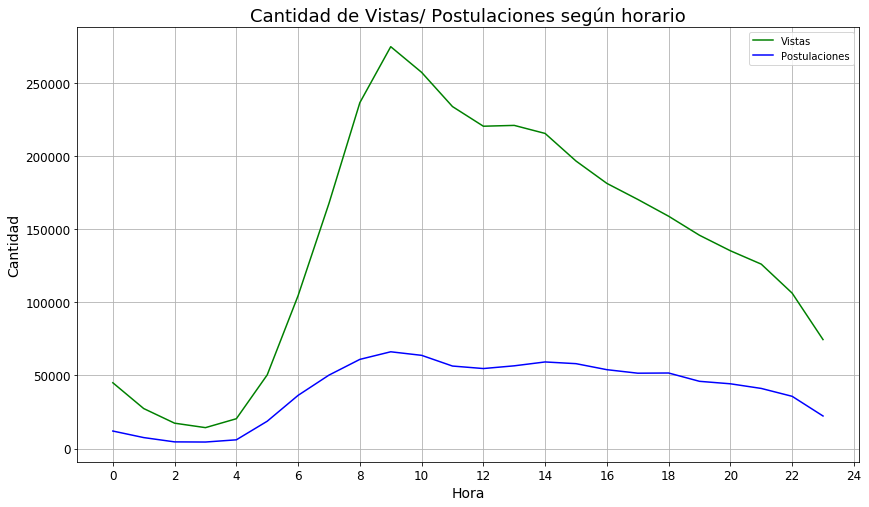

In [30]:
plot_horario = merge_postulaciones_vistas\
     .plot(kind = 'line', color=['green','blue'],legend=None, grid = True, fontsize=12, figsize=(14,8), rot=0)

plot_horario.set_title("Cantidad de Vistas/ Postulaciones según horario", fontsize=18)
plot_horario.set_xlabel("Hora", fontsize=14)
plot_horario.set_ylabel("Cantidad", fontsize=14)
plot_horario.legend(labels = ['Vistas', 'Postulaciones'])
plot_horario.xaxis.set_major_locator(plt.MaxNLocator(13))

El rango horario de mayor actividad es por la mañana de 8:00 a 11:00 hs.

c:\users\casarodri\anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


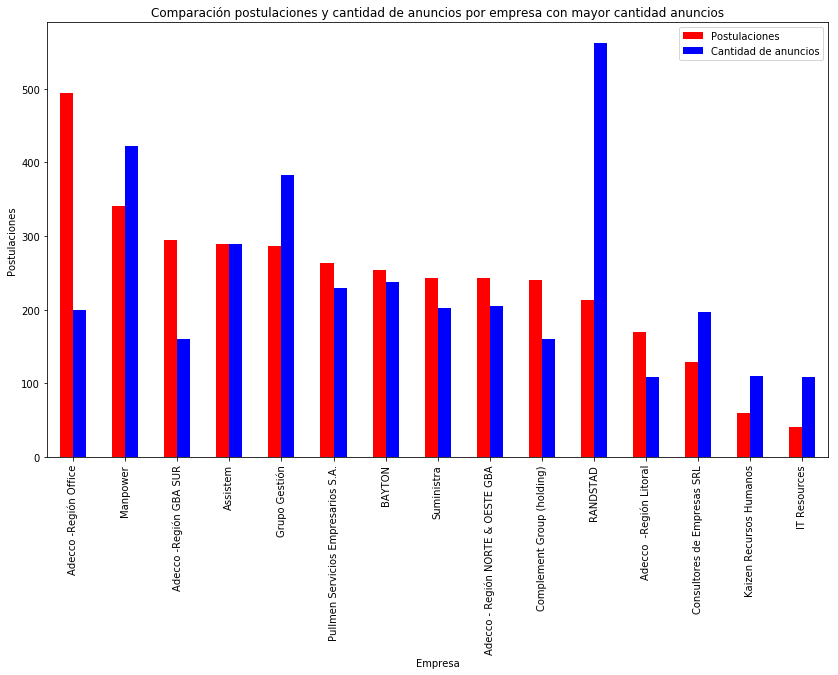

In [31]:
#Postulaciones de las empresas con mayor cantidad de anuncios
df_por_empresa = avisos_detalles_vist_post[['denominacion_empresa', 'cantidad_postulaciones']]

df_por_empresa = df_por_empresa.groupby(['denominacion_empresa']).agg([np.mean, np.size]).reset_index().sort_values(('cantidad_postulaciones', 'mean'),ascending=False)
df_por_empresa = df_por_empresa.loc[df_por_empresa[('cantidad_postulaciones','size')]>100,:].head(15)

df_por_empresa_plot = df_por_empresa.plot(kind='bar',color=['red','blue'],x = 'denominacion_empresa', y = [('cantidad_postulaciones', 'mean'),('cantidad_postulaciones', 'size')],title='Comparación postulaciones y cantidad de anuncios por empresa con mayor cantidad anuncios',figsize=(14,8))
df_por_empresa_plot.set_xlabel("Empresa")
df_por_empresa_plot.set_ylabel("Postulaciones")
df_por_empresa_plot.legend(labels = ['Postulaciones', 'Cantidad de anuncios'])

### Top 10 Empresas con más vistas a sus anuncios

In [32]:
# Hago un right join ya que me interesan aquellos avisos que efectivamente
# fueron visualizados por alguien --> idpostulante = NaN no me interesa
vistas_detalles = pd.merge(avisos_detalles, avisos_vistas, on='idaviso', how='right')
vistas_detalles.head()

,idaviso,titulo,descripcion,nombre_zona,jornada_laboral,nivel_laboral,nombre_area,denominacion_empresa,idpostulante,fecha_vista,mes_vista,dia_semana_vista,hora_vista
0,17903700,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste,OqbXzRv,2018-02-24,Febrero,Sábado,12:44:47
1,1000150677,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL,PmGOoVJ,2018-02-23,Febrero,Viernes,14:09:25
2,1000150677,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL,PmGOoVJ,2018-02-26,Febrero,Lunes,15:33:31
3,1000610287,CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,Full-time,Senior / Semi-Senior,Transporte,Wurth Argentina S.A,OqrWl3N,2018-02-23,Febrero,Viernes,18:20:50
4,1000610287,CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,Full-time,Senior / Semi-Senior,Transporte,Wurth Argentina S.A,OqrWl3N,2018-02-23,Febrero,Viernes,18:20:33


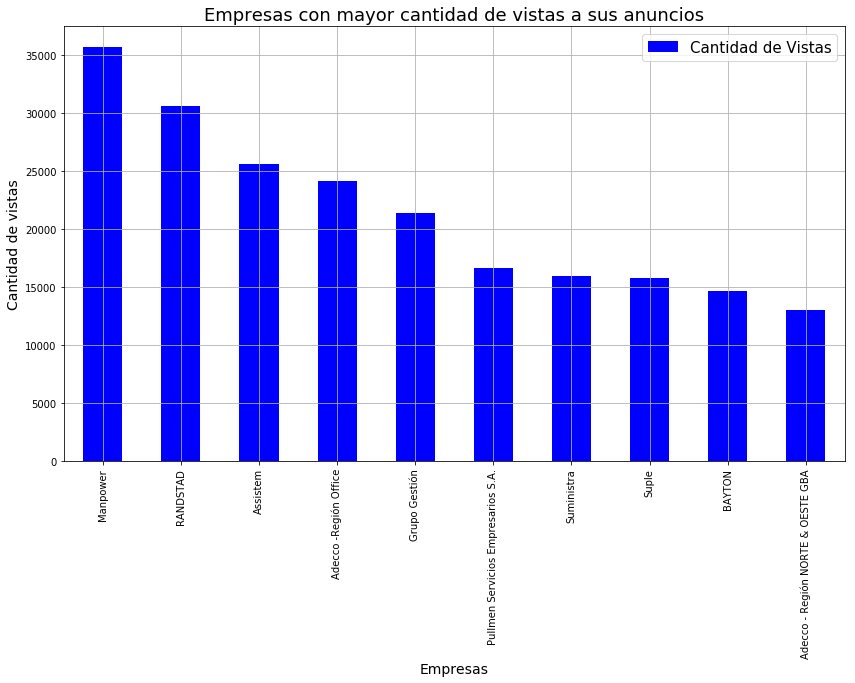

In [33]:
plot_empresas_vistas = vistas_detalles['denominacion_empresa'].value_counts().head(10).plot(kind='bar', grid = True, color='blue', figsize=(14,8))

plot_empresas_vistas.set_title('Empresas con mayor cantidad de vistas a sus anuncios', fontsize=18)
plot_empresas_vistas.set_xlabel('Empresas', fontsize=14)
plot_empresas_vistas.set_ylabel('Cantidad de vistas', fontsize=14)
plot_empresas_vistas.legend(labels = ['Cantidad de Vistas'],fontsize=15)

### Top 10 Empresas con más postulaciones a sus anuncios

In [34]:
# Hago un right join ya que me interesan aquellos avisos que efectivamente
# recibieron postulaciones de alguien --> idpostulante = NaN no me interesa
postulaciones_detalles = pd.merge(avisos_detalles, postulaciones, on='idaviso', how='right')
postulaciones_detalles.head()

,idaviso,titulo,descripcion,nombre_zona,jornada_laboral,nivel_laboral,nombre_area,denominacion_empresa,idpostulante,fecha_post,mes_post,dia_semana_post,hora_post
0,8725750,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,Full-time,Senior / Semi-Senior,Comercial,VENTOR,4rWEjrA,2018-01-16,Enero,Martes,21:58:40
1,8725750,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,Full-time,Senior / Semi-Senior,Comercial,VENTOR,qewD0aR,2018-02-06,Febrero,Martes,15:51:54
2,8725750,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,Full-time,Senior / Semi-Senior,Comercial,VENTOR,3N2dBdq,2018-02-08,Febrero,Jueves,10:49:43
3,8725750,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,Full-time,Senior / Semi-Senior,Comercial,VENTOR,0zkx2dY,2018-02-07,Febrero,Miércoles,06:32:25
4,8725750,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,Full-time,Senior / Semi-Senior,Comercial,VENTOR,ZDrdPVR,2018-01-15,Enero,Lunes,09:23:40


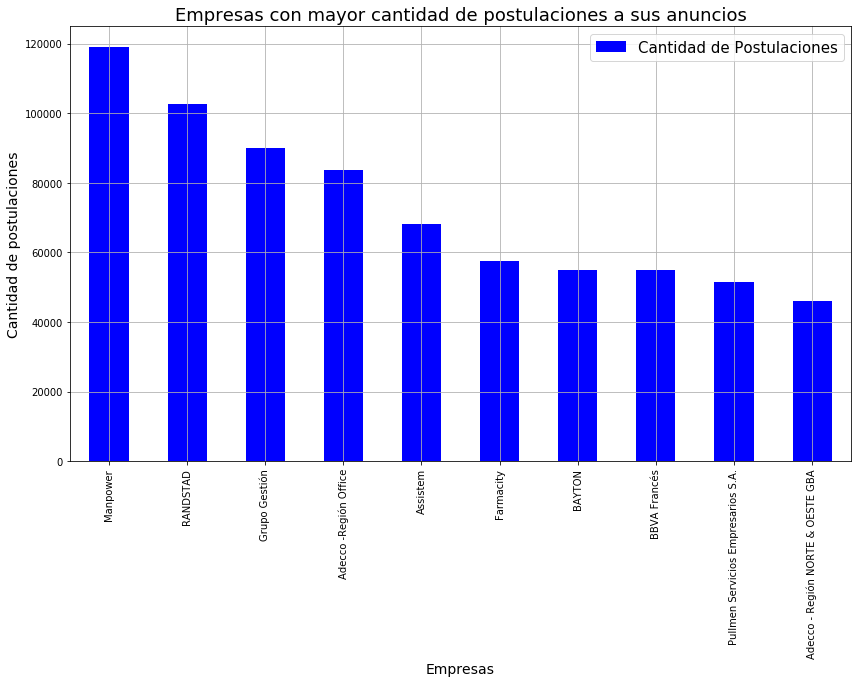

In [35]:
plot_empresas_postulaciones = postulaciones_detalles['denominacion_empresa'].value_counts().head(10).plot(kind='bar',grid=True, color='blue', figsize=(14,8))
plot_empresas_postulaciones.set_title('Empresas con mayor cantidad de postulaciones a sus anuncios', fontsize=18)
plot_empresas_postulaciones.set_xlabel('Empresas', fontsize=14)
plot_empresas_postulaciones.set_ylabel('Cantidad de postulaciones', fontsize=14)
plot_empresas_postulaciones.legend(labels = ['Cantidad de Postulaciones'],fontsize=15)

In [36]:
avisos_jornada_laboral = avisos_detalles.dropna(subset=["jornada_laboral"])
avisos_jornada_laboral.groupby("jornada_laboral").count()

,idaviso,titulo,descripcion,nombre_zona,nivel_laboral,nombre_area,denominacion_empresa
jornada_laboral,,,,,,,
Fines de Semana,14,14,14,14,14,14,14
Full-time,12339,12339,12339,12339,12339,12339,12335
Part-time,863,863,863,863,863,863,862
Pasantia,63,63,63,63,63,63,63
Por Contrato,37,37,37,37,37,37,37
Por Horas,63,63,63,63,63,63,63
Primer empleo,3,3,3,3,3,3,3
Teletrabajo,110,110,110,110,110,110,110
Temporario,42,42,42,42,42,42,42


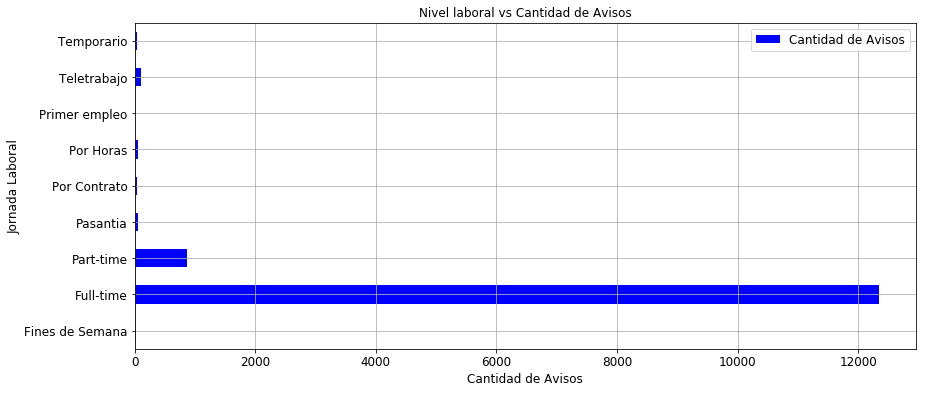

In [37]:
plot=avisos_detalles.groupby(['jornada_laboral'])\
     .agg(np.size).plot(kind = 'barh',\
     color='blue',legend=None,title='Nivel laboral vs Cantidad de Avisos',\
     grid = True, fontsize=12, figsize=(14,6))
plot.set_xlabel("Cantidad de Avisos", fontsize=12)
plot.set_ylabel("Jornada Laboral", fontsize=12)
plot.legend(labels = ['Cantidad de Avisos'],fontsize=12)

### Cantidad de vistas según la zona

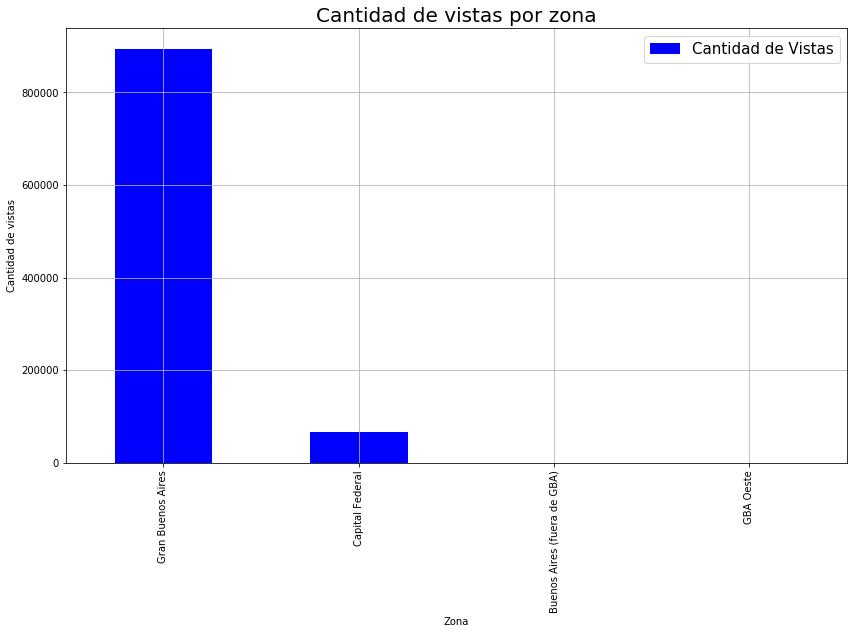

In [38]:
plot_zonas_vistas = vistas_detalles['nombre_zona'].value_counts().plot(kind='bar',grid=True, color='blue', figsize=(14,8))
plot_zonas_vistas.set_title('Cantidad de vistas por zona', fontsize=20)
plot_zonas_vistas.set_xlabel('Zona')
plot_zonas_vistas.set_ylabel('Cantidad de vistas')
plot_zonas_vistas.legend(labels = ['Cantidad de Vistas'],fontsize=15)
plot_zonas_vistas

Podemos ver un gran predominio del Gran Buenos Aires cuando se trata de vista de los anuncios. Parece ser que en Capital Federal la gente no está tan activa en la búsqueda laboral.

### Cantidad de postulaciones según la zona

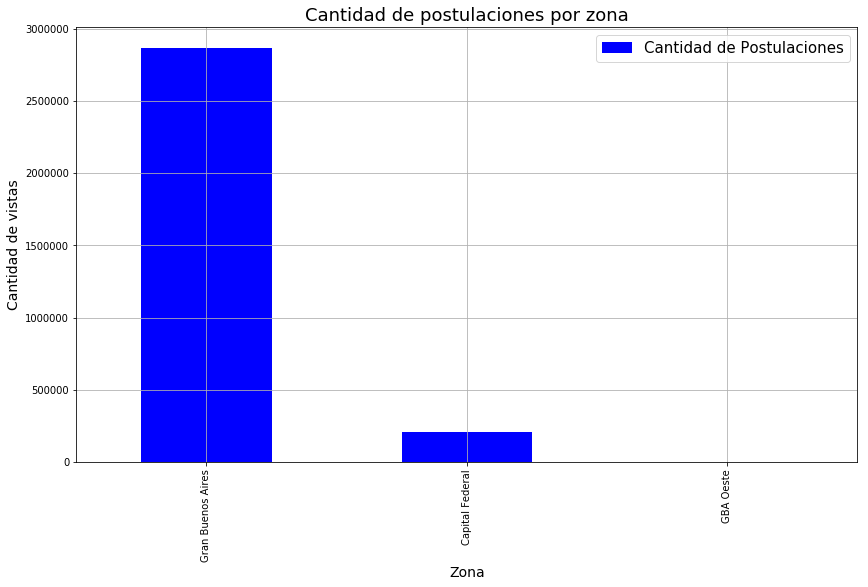

In [39]:
plot_zonas_postulaciones = postulaciones_detalles['nombre_zona'].value_counts().plot(kind='bar',grid=True, color='blue', figsize=(14,8))
plot_zonas_postulaciones.set_title('Cantidad de postulaciones por zona', fontsize=18)
plot_zonas_postulaciones.set_xlabel('Zona', fontsize=14)
plot_zonas_postulaciones.set_ylabel('Cantidad de vistas', fontsize=14)
plot_zonas_postulaciones.legend(labels = ['Cantidad de Postulaciones'],fontsize=15)
plot_zonas_postulaciones

Al igual que con las vistas, el Gran Buenos Aires predomina fuertemente en cantidades.

### Cantidad de vistas según jornada de trabajo

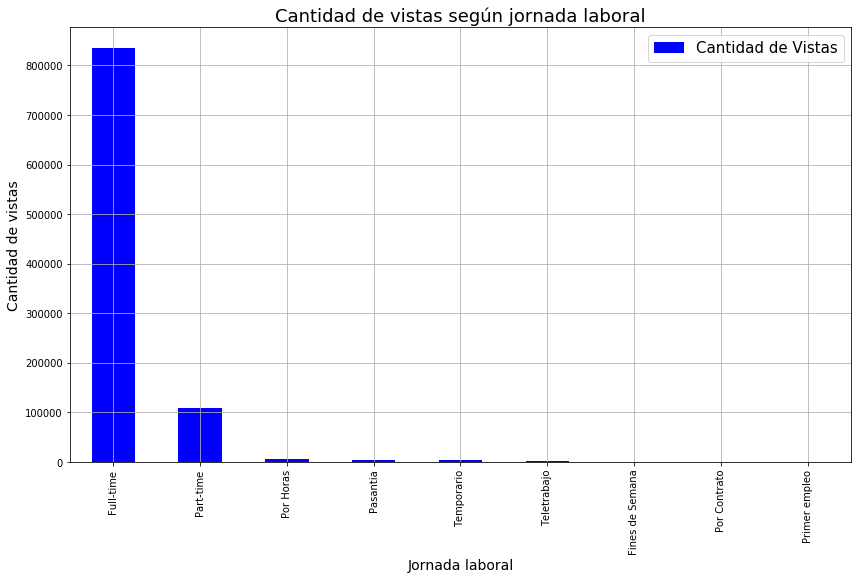

In [40]:
plot_jornadas_vistas = vistas_detalles['jornada_laboral'].value_counts().plot(kind='bar',grid=True, color='blue', figsize=(14,8))
plot_jornadas_vistas.set_title('Cantidad de vistas según jornada laboral', fontsize=18)
plot_jornadas_vistas.set_xlabel('Jornada laboral', fontsize=14)
plot_jornadas_vistas.set_ylabel('Cantidad de vistas', fontsize=14)
plot_jornadas_vistas.legend(labels = ['Cantidad de Vistas'],fontsize=15)
plot_jornadas_vistas

La jornada laboral más buscada es la de full-time, muy por encima del resto de las jornadas.

### Cantidad de postulaciones según jornada de trabajo

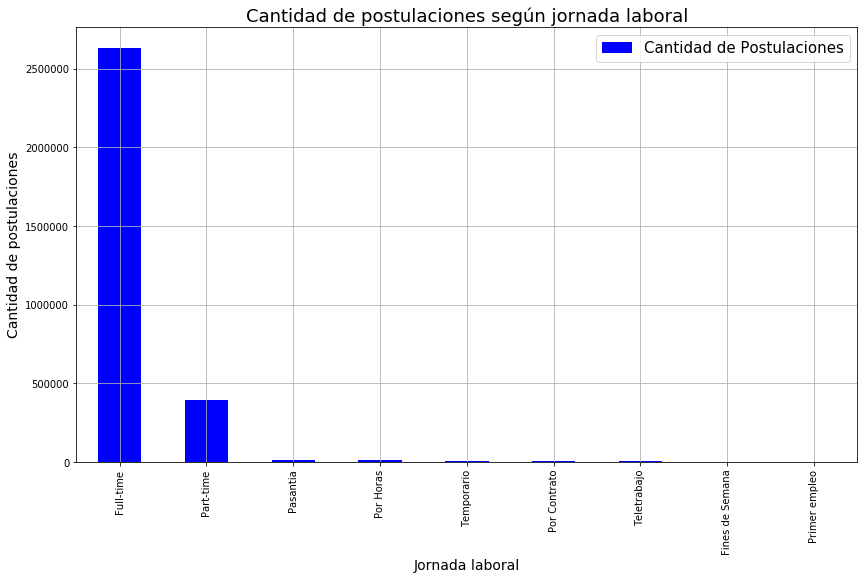

In [41]:
plot_jornadas_postulaciones = postulaciones_detalles['jornada_laboral'].value_counts().plot(kind='bar',grid=True, color='blue', figsize=(14,8))
plot_jornadas_postulaciones.set_title('Cantidad de postulaciones según jornada laboral', fontsize=18)
plot_jornadas_postulaciones.set_xlabel('Jornada laboral', fontsize=14)
plot_jornadas_postulaciones.set_ylabel('Cantidad de postulaciones', fontsize=14)
plot_jornadas_postulaciones.legend(labels = ['Cantidad de Postulaciones'],fontsize=15)
plot_jornadas_postulaciones

La mayor cantidad de postulaciones se da a trabajos full-time, muy por encima del resto.

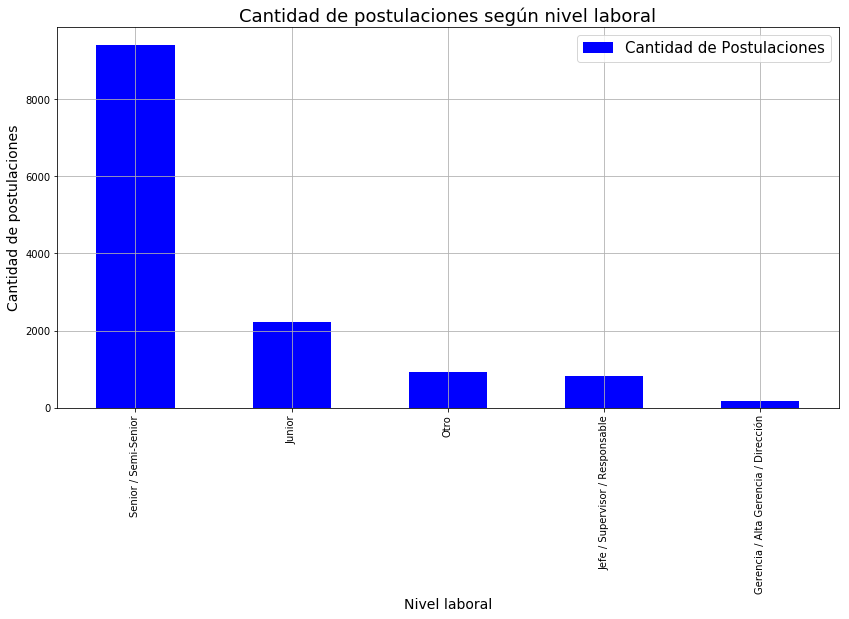

In [42]:
plot=avisos_detalles['nivel_laboral'].value_counts().plot(kind='bar',grid=True, color="blue",figsize=(14,7))

plot.set_title('Cantidad de postulaciones según nivel laboral', fontsize=18)
plot.set_xlabel('Nivel laboral', fontsize=14)
plot.set_ylabel('Cantidad de postulaciones', fontsize=14)
plot.legend(labels = ['Cantidad de Postulaciones'],fontsize=15)



### Top 10 Áreas con mas vistas

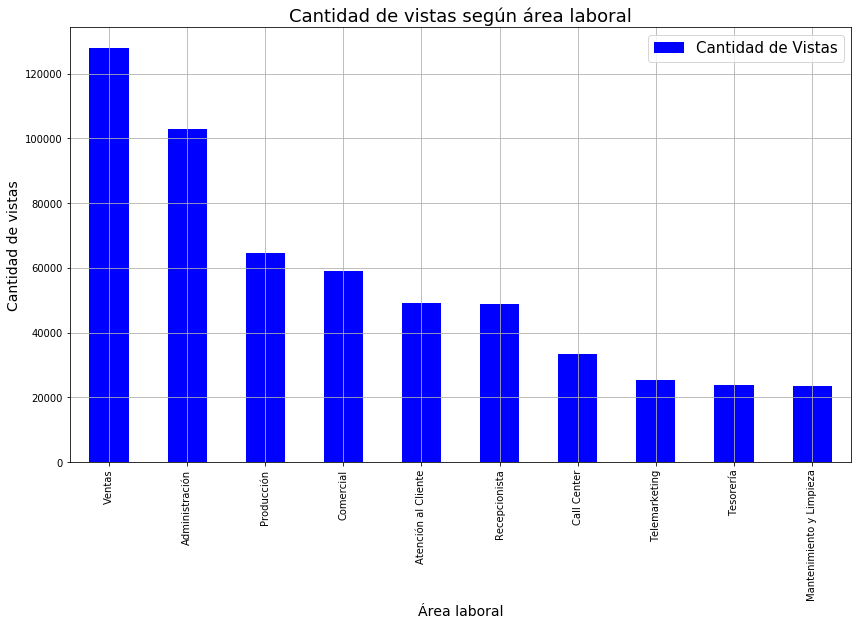

In [43]:
plot_areas_vistas = vistas_detalles['nombre_area'].value_counts().head(10).plot(kind='bar',grid=True, color='blue', figsize=(14,8))
plot_areas_vistas.set_title('Cantidad de vistas según área laboral', fontsize=18)
plot_areas_vistas.set_xlabel('Área laboral', fontsize=14)
plot_areas_vistas.set_ylabel('Cantidad de vistas', fontsize=14)
plot_areas_vistas.legend(labels = ['Cantidad de Vistas'],fontsize=15)
plot_areas_vistas

### Top 10 Áreas con más postulaciones

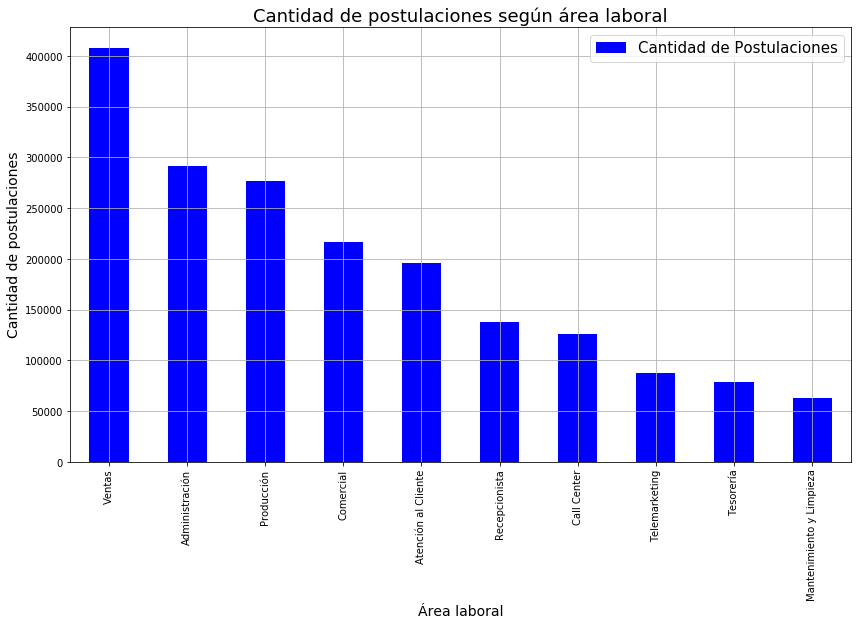

In [44]:
plot_areas_postulaciones = postulaciones_detalles['nombre_area'].value_counts().head(10).plot(kind='bar', grid=True, color='blue', figsize=(14,8))
plot_areas_postulaciones.set_title('Cantidad de postulaciones según área laboral', fontsize=18)
plot_areas_postulaciones.set_xlabel('Área laboral', fontsize=14)
plot_areas_postulaciones.set_ylabel('Cantidad de postulaciones', fontsize=14)
plot_areas_postulaciones.legend(labels = ['Cantidad de Postulaciones'],fontsize=15)
plot_areas_postulaciones

### Ranking de Nivel laboral buscado por empresas


In [45]:
avisos_nivel_laboral = avisos_detalles.dropna(subset=["nivel_laboral"])
avisos_nivel_laboral.groupby("nivel_laboral")['nivel_laboral'].count()

nivel_laboral
Gerencia / Alta Gerencia / Dirección     181
Jefe / Supervisor / Responsable          809
Junior                                  2216
Otro                                     921
Senior / Semi-Senior                    9407
Name: nivel_laboral, dtype: int64

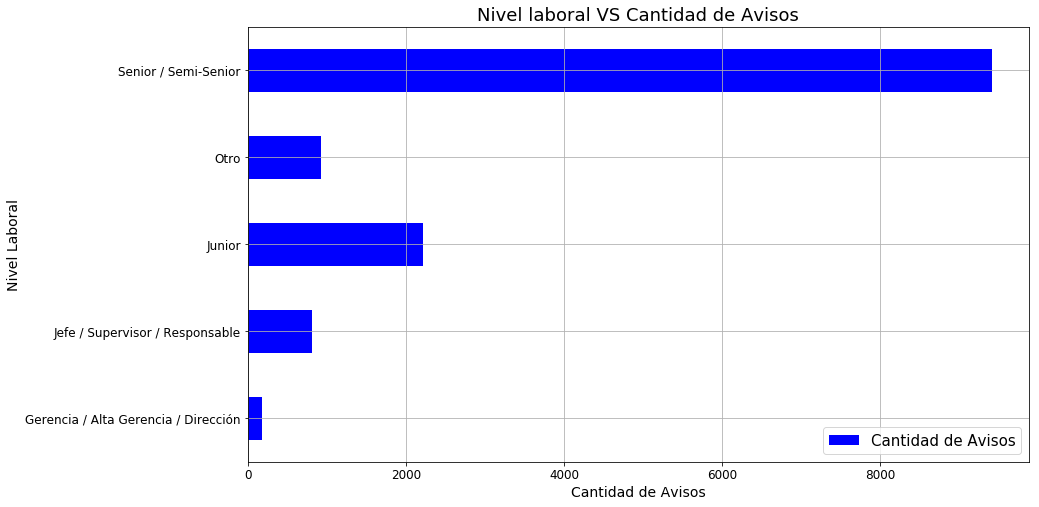

In [46]:
plot_nivel_laboral = avisos_detalles.groupby(['nivel_laboral'])\
     .agg(np.size).plot(kind = 'barh',\
     color='blue',legend=None, grid = True, fontsize=12, figsize=(14,8))
plot_nivel_laboral.set_title("Nivel laboral VS Cantidad de Avisos", fontsize=18)
plot_nivel_laboral.set_xlabel("Cantidad de Avisos", fontsize=14)
plot_nivel_laboral.set_ylabel("Nivel Laboral", fontsize=14)
plot_nivel_laboral.legend(labels = ['Cantidad de Avisos'],fontsize=15)

### Ranking de Jornadas laborales buscadas por empresas

In [47]:
avisos_jornada_laboral = avisos_detalles.dropna(subset=["jornada_laboral"])
avisos_jornada_laboral.groupby("jornada_laboral")['jornada_laboral'].count()

jornada_laboral
Fines de Semana       14
Full-time          12339
Part-time            863
Pasantia              63
Por Contrato          37
Por Horas             63
Primer empleo          3
Teletrabajo          110
Temporario            42
Name: jornada_laboral, dtype: int64

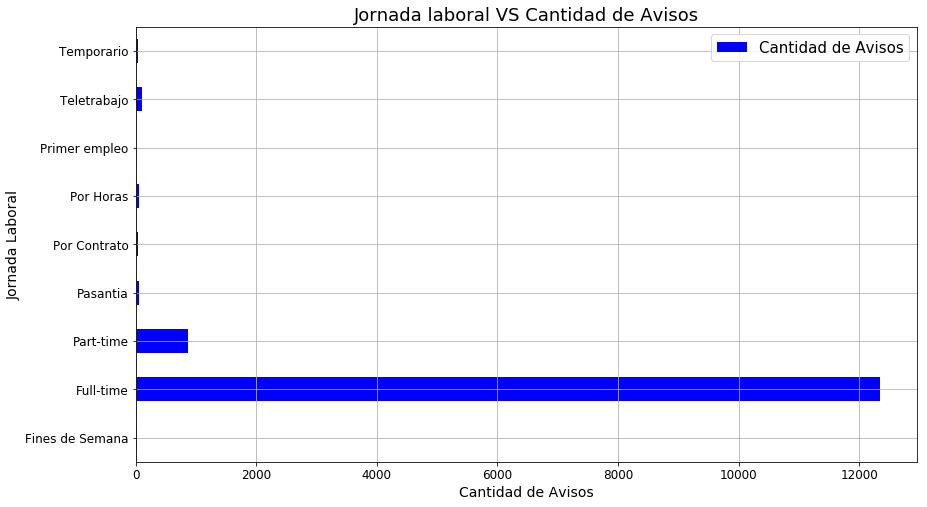

In [48]:
plot_jornada_laboral = avisos_detalles.groupby(['jornada_laboral'])\
     .agg(np.size).plot(kind = 'barh',\
     color='blue',legend=None, grid = True, fontsize=12, figsize=(14,8))
plot_jornada_laboral.set_title("Jornada laboral VS Cantidad de Avisos", fontsize=18)    
plot_jornada_laboral.set_xlabel("Cantidad de Avisos", fontsize=14)
plot_jornada_laboral.set_ylabel("Jornada Laboral", fontsize=14)
plot_jornada_laboral.legend(labels = ['Cantidad de Avisos'],fontsize=15)

### C. titulos de los posulantes.

In [49]:
postulantes_titulos = postulantes.dropna(subset=["titulo_univ"])
postulantes_titulos.groupby("titulo_univ").count()

,idpostulante,edad,sexo,estado
titulo_univ,,,,
Doctorado,214,211,211,214
Master,3598,3577,3577,3598
Otro,24748,24593,24593,24748
Posgrado,7387,7344,7344,7387
Secundario,110256,108584,108584,110256
Terciario/Técnico,47733,47233,47233,47733
Universitario,104295,103115,103115,104295


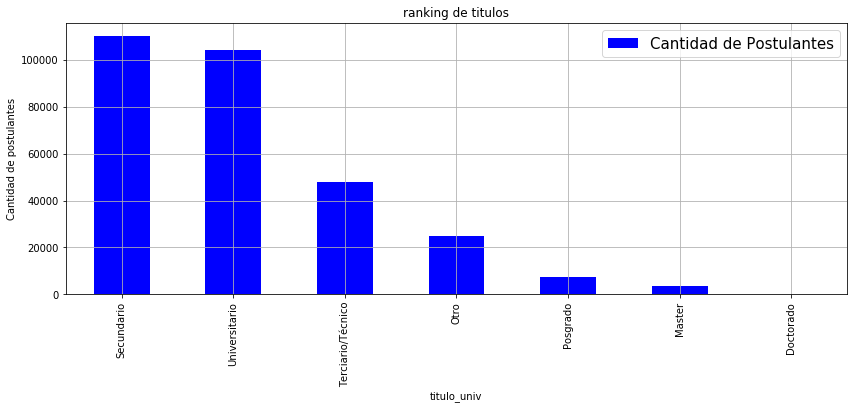

In [50]:
plot = postulantes_titulos.groupby('titulo_univ')['titulo_univ'].agg('count')\
                  .sort_values(ascending=False)\
                  .plot(kind='bar', grid=True, color="blue",figsize=(14,5), title='ranking de titulos')        
plot.set_xlabel('titulo_univ')
plot.set_ylabel('Cantidad de postulantes')
plot.legend(labels = ['Cantidad de Postulantes'],fontsize=15)

### D. estado por titulo secundario

In [51]:
postulantes_titulos_estado = postulantes_titulos.pivot_table(index='titulo_univ', columns='estado', values='idpostulante', aggfunc=np.size)
postulantes_titulos_estado

estado,Abandonado,En Curso,Graduado
titulo_univ,,,
Doctorado,15,94,105
Master,144,1519,1935
Otro,947,4919,18882
Posgrado,317,2239,4831
Secundario,3156,3995,103105
Terciario/Técnico,5692,15032,27009
Universitario,14955,50733,38607


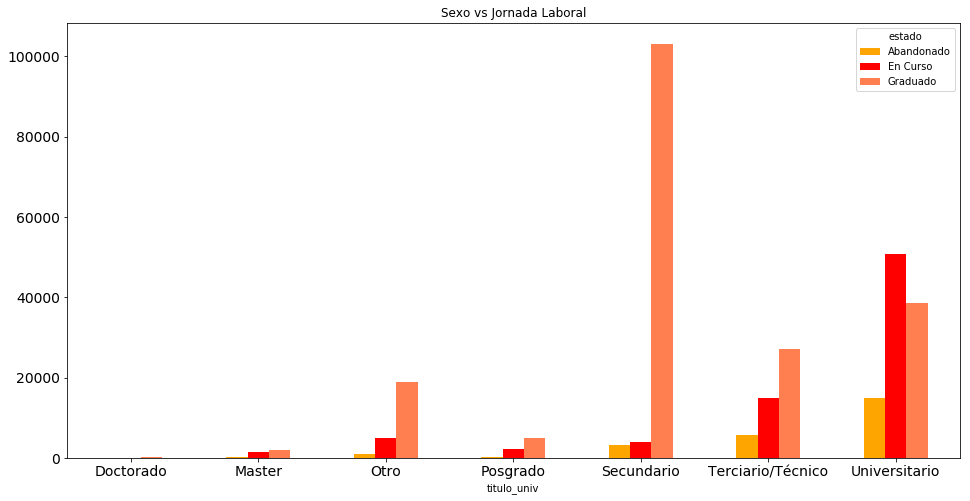

In [52]:

plot = postulantes_titulos_estado.plot(kind='bar', figsize=(16,8), fontsize=14, rot=0, title ='Sexo vs Jornada Laboral', color=['orange','red','coral',])

In [53]:
postulantes_detalle = pd.merge(postulaciones, postulantes_nac_sexo, on='idpostulante', how='inner')
postulantes_detalle = pd.merge(postulantes_detalle, avisos_detalles, on='idaviso', how='inner')
postulantes_detalle = postulantes_detalle.drop_duplicates(subset=['idpostulante', 'idaviso'], keep=False)
postulantes_detalle = postulantes_detalle.drop(columns=['fecha_post','mes_post','dia_semana_post','hora_post', 'titulo', 'descripcion'])
postulantes_detalle.head()

,idaviso,idpostulante,edad,sexo,nombre_zona,jornada_laboral,nivel_laboral,nombre_area,denominacion_empresa
0,1112257047,NM5M,48,FEM,Gran Buenos Aires,Part-time,Otro,Atención al Cliente,Eficasia Argentina SA
1,1112257047,1kJqGb,34,FEM,Gran Buenos Aires,Part-time,Otro,Atención al Cliente,Eficasia Argentina SA
2,1112257047,eOE9Rr,39,FEM,Gran Buenos Aires,Part-time,Otro,Atención al Cliente,Eficasia Argentina SA
3,1112257047,Zrx8Xz,40,FEM,Gran Buenos Aires,Part-time,Otro,Atención al Cliente,Eficasia Argentina SA
4,1112257047,ZrKNQY,33,FEM,Gran Buenos Aires,Part-time,Otro,Atención al Cliente,Eficasia Argentina SA


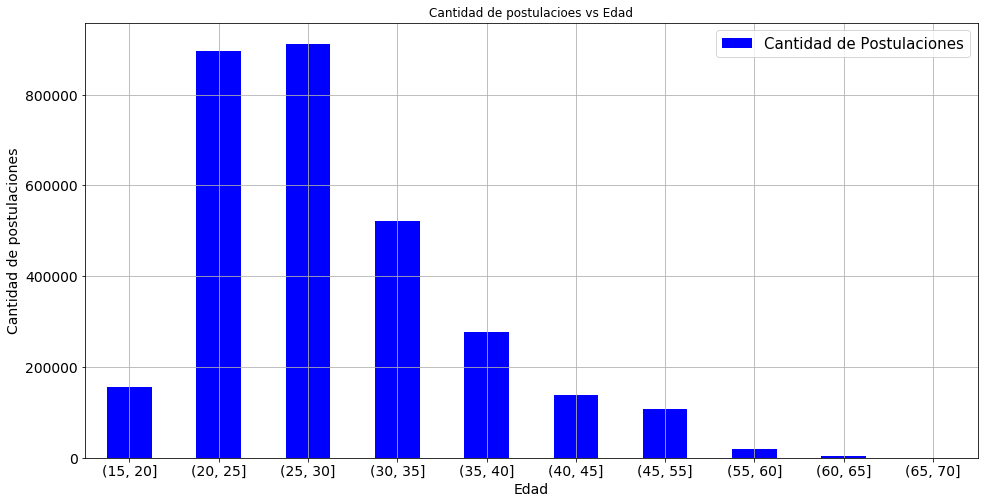

In [54]:
rangos = [15,20,25,30,35,40,45,55,60,65,70]
postulantes_detalle['rangos'] = pd.cut(postulantes_detalle.edad, rangos)
plot = postulantes_detalle.groupby('rangos')['rangos'].agg('count').plot(kind='bar',grid=True, fontsize=14, figsize=(16,8), rot=0, color='blue', title ='Cantidad de postulacioes vs Edad')
plot.set_xlabel('Edad', fontsize=14)
plot.set_ylabel('Cantidad de postulaciones', fontsize=14)
plot.legend(labels = ['Cantidad de Postulaciones'],fontsize=15)

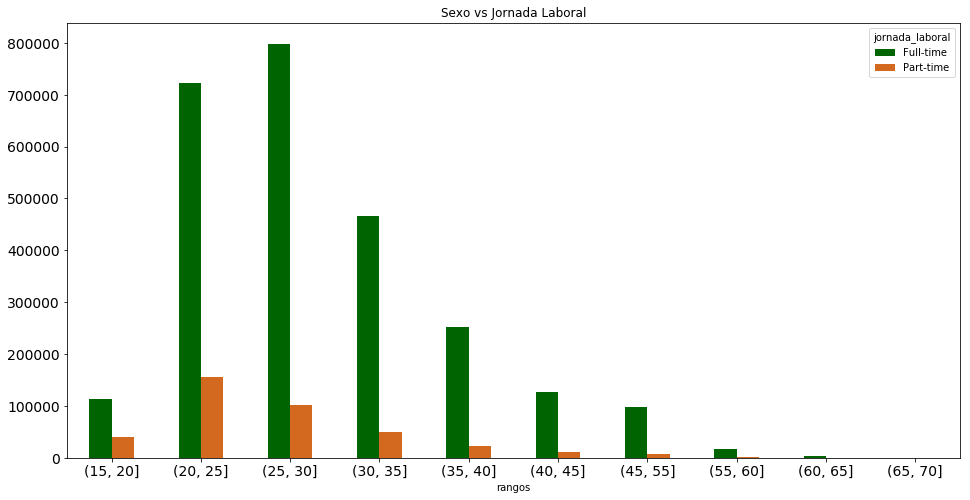

In [55]:
postulantes_detalle_edad = postulantes_detalle.pivot_table(index='rangos', columns='jornada_laboral', values='idaviso', aggfunc=np.size)
postulantes_detalle_edad = postulantes_detalle_edad.loc[:, ['Full-time','Part-time']]
plot =postulantes_detalle_edad.plot(kind='bar', figsize=(16,8), fontsize=14, rot=0, title ='Sexo vs Jornada Laboral', color=['darkgreen','chocolate',])

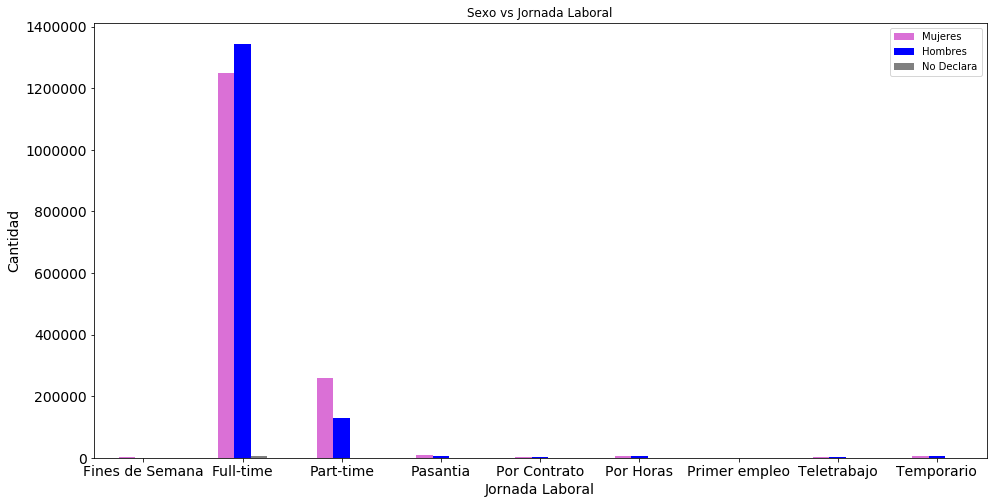

In [56]:
postulantes_detalle_sexo = postulantes_detalle.pivot_table(index='jornada_laboral', columns='sexo', values='idaviso', aggfunc=np.size)
plot=postulantes_detalle_sexo.plot(kind='bar', figsize=(16,8), fontsize=14, rot=0, title ='Sexo vs Jornada Laboral', color=['orchid','blue','grey'])
plot.set_xlabel('Jornada Laboral', fontsize=14)
plot.set_ylabel('Cantidad', fontsize=14)
plot.legend(labels = ['Mujeres', 'Hombres', 'No Declara'])


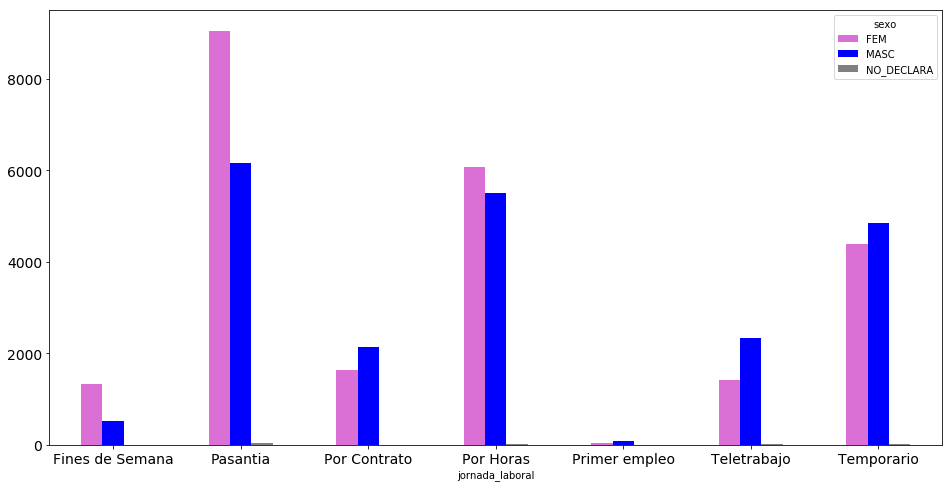

In [57]:

postulantes_detalle_sexo.drop(['Full-time', 'Part-time']).plot(kind='bar', figsize=(16,8), color=['orchid','blue','grey'], fontsize=14, rot=0)
plot.set_xlabel('Jornada Laboral', fontsize=14)
plot.set_ylabel('Cantidad', fontsize=14)
plot.legend(labels = ['Mujeres', 'Hombres', 'No Declara'])

## Observación: Hay más postulaciones de hombres a pesar de haber mujeres que hombres, es decir, los hombres se postulan a más avisos que las mujeres